In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import layers
from keras.engine.sequential import Sequential
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("gas_turbines.csv")

In [3]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data.shape

(15039, 11)

In [5]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [10]:
fig, ax = plt.subplots(6,2, figsize = (17,20),dpi=600)
sns.distplot(data["AT"],ax=ax[0,0])
sns.distplot(data["AP"],ax=ax[0,1])
sns.distplot(data["AH"],ax=ax[1,0])
sns.distplot(data["AFDP"],ax=ax[1,1])
sns.distplot(data["GTEP"],ax=ax[2,0])
sns.distplot(data["TIT"],ax=ax[2,1])
sns.distplot(data["TAT"],ax=ax[3,0])
sns.distplot(data["TEY"],ax=ax[3,1])
sns.distplot(data["CDP"],ax=ax[4,0])
sns.distplot(data["CO"],ax=ax[4,1])
sns.distplot(data["NOX"],ax=ax[5,0])

<AxesSubplot:xlabel='NOX', ylabel='Density'>

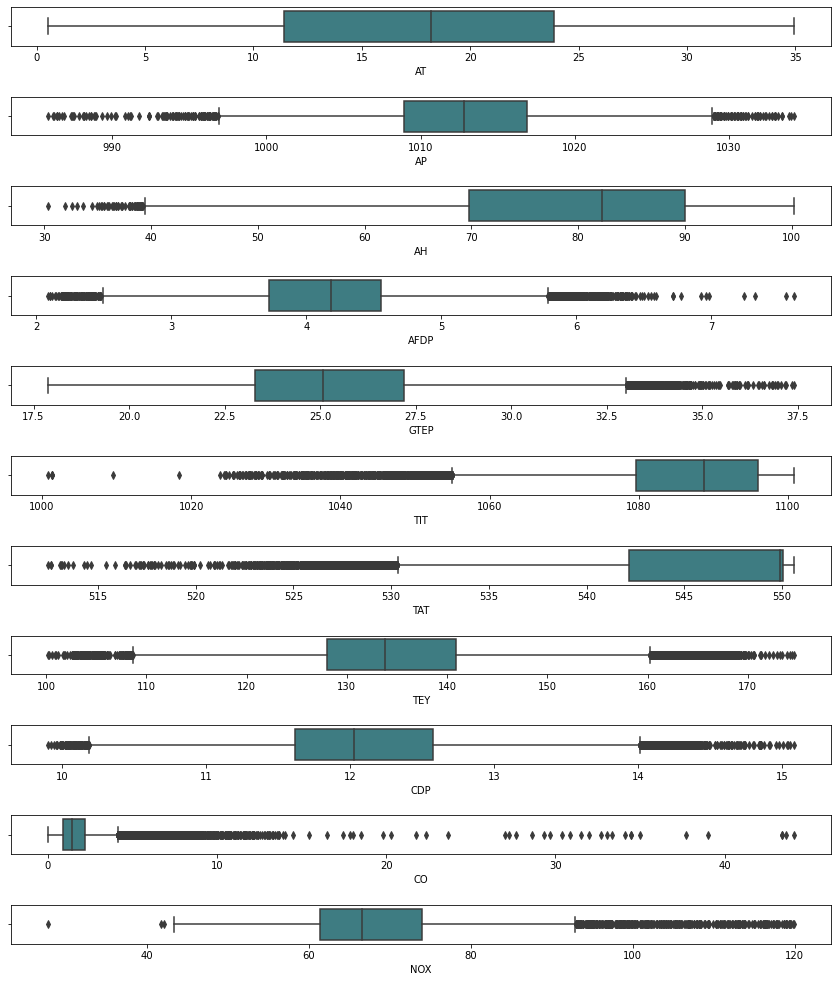

In [11]:
fig, axes=plt.subplots(11,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='AT',data= data,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data= data,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data= data,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data= data,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data= data,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data= data,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data= data,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data= data,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data= data,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data= data,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data= data,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

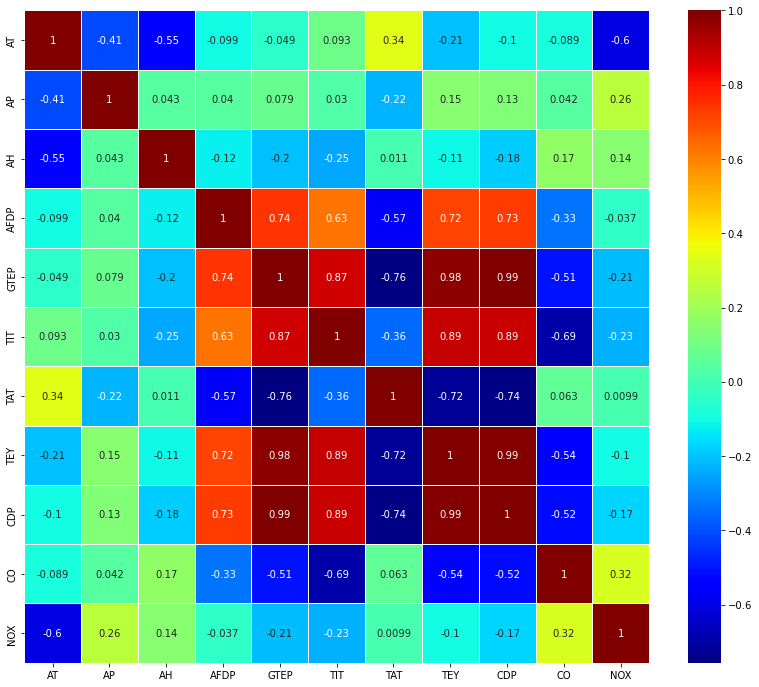

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(data= data.corr(), cmap= "jet", annot= True, linewidths= 1, linecolor= 'white')

<AxesSubplot:>

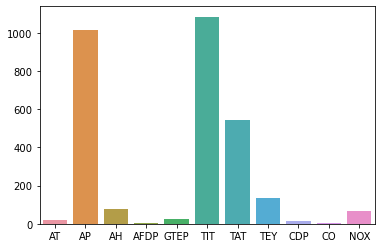

In [14]:
sns.barplot(data=data)


In [15]:
X=data.iloc[:,:10]
Y=data.iloc[:,10]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

In [17]:
Y=np.reshape(Y.to_numpy(), (-1,1)) 

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [19]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15, input_dim=10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='relu'))       

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mae"])

In [22]:
history=model.fit(X,Y,validation_split=0.20,epochs=50,batch_size=100)

Epoch 1/50
121/121 [==============================] - 1s 5ms/step - loss: 512.3578 - mae: 14.6977 - val_loss: 180.6266 - val_mae: 10.4594
Epoch 2/50
121/121 [==============================] - 1s 5ms/step - loss: 128.7371 - mae: 8.8861 - val_loss: 179.0008 - val_mae: 10.4662
Epoch 3/50
121/121 [==============================] - 1s 4ms/step - loss: 124.1707 - mae: 8.7434 - val_loss: 167.1711 - val_mae: 9.9508
Epoch 4/50
121/121 [==============================] - 0s 3ms/step - loss: 119.4099 - mae: 8.5550 - val_loss: 161.9619 - val_mae: 9.8312
Epoch 5/50
121/121 [==============================] - ETA: 0s - loss: 113.8363 - mae: 8.348 - 0s 3ms/step - loss: 114.0100 - mae: 8.3667 - val_loss: 152.5703 - val_mae: 9.4710
Epoch 6/50
121/121 [==============================] - 0s 2ms/step - loss: 107.9586 - mae: 8.1482 - val_loss: 144.9255 - val_mae: 9.1734
Epoch 7/50
121/121 [==============================] - 0s 2ms/step - loss: 102.5822 - mae: 7.9405 - val_loss: 141.7897 - val_mae: 9.0903
Epoch

In [23]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(20, input_dim=10, activation='relu'))
model1.add(tf.keras.layers.Dense(15, activation='relu'))
model1.add(tf.keras.layers.Dense(1,activation='relu')) 
model1.summary()
model1.compile(loss="mean_squared_error",optimizer="adam",metrics=["mae"])
history=model1.fit(X,Y,validation_split=0.20,epochs=100,batch_size=150)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
81/81 [==============================] - 1s 5ms/step - loss: 3449.1365 - mae: 34.4760 - val_loss: 227.9785 - val_mae: 11.9726
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 139.4812 - mae: 9.0769 - val_loss: 221.5356 - val_mae: 11.8983
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 135.1212 - mae: 8.9774 - val_loss: 216.

In [44]:
model2 = tf.keras.Sequential()
tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train)),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dense(1, activation='linear')

# Compile the second model
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

# Fit the second model to the training data
model2.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/100
329/329 [==============================] - 1s 2ms/step - loss: 279.9610 - mse: 217494.5312 - val_loss: 279.9383 - val_mse: 217457.0938
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 279.9608 - mse: 217494.4531 - val_loss: 279.9383 - val_mse: 217457.0938
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 279.9609 - mse: 217494.4531 - val_loss: 279.9383 - val_mse: 217457.0938
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 279.9610 - mse: 217494.4531 - val_loss: 279.9383 - val_mse: 217457.0938
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 279.9609 - mse: 217494.4062 - val_loss: 279.9383 - val_mse: 217457.0938
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 279.9608 - mse: 217494.4062 - val_loss: 279.9383 - val_mse: 217457.0938
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 279.9609 - mse: 217494.5312 - val_loss: 279

In [45]:
y_pred = model.predict(X_test)
y_pred

array([[72.38904 ],
       [85.249664],
       [73.86097 ],
       ...,
       [74.59474 ],
       [74.3538  ],
       [75.2336  ]], dtype=float32)

In [46]:
y_pred1 = model1.predict(X_test)
y_pred1

array([[63.387794],
       [83.668   ],
       [60.13125 ],
       ...,
       [62.368347],
       [67.20289 ],
       [71.4181  ]], dtype=float32)

In [47]:
y_pred2= model2.predict(X_test)
y_pred2

array([[7.9557e+00, 1.0163e+03, 8.9168e+01, ..., 1.6434e+02, 1.4096e+01,
        4.3621e-01],
       [5.7488e+00, 1.0184e+03, 7.7769e+01, ..., 1.3367e+02, 1.1750e+01,
        1.9569e+00],
       [8.6689e+00, 1.0268e+03, 8.4360e+01, ..., 1.6341e+02, 1.4219e+01,
        4.3030e-01],
       ...,
       [2.0411e+01, 1.0104e+03, 6.8023e+01, ..., 1.1153e+02, 1.0548e+01,
        2.9048e+00],
       [1.7827e+01, 1.0207e+03, 8.8757e+01, ..., 1.0977e+02, 1.0366e+01,
        4.7782e+00],
       [1.1087e+01, 1.0089e+03, 8.6122e+01, ..., 1.3368e+02, 1.1810e+01,
        5.6444e-01]])

In [48]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [49]:
history_data = pd.DataFrame(history.history)
history_data["epoch"]=history.epoch
history_data.tail()

,loss,mse,val_loss,val_mse,epoch
145,3.048727,22.404116,3.158224,33.783737,145
146,3.180605,23.294781,3.314417,32.211842,146
147,3.226008,23.565355,3.393619,34.879517,147
148,3.032347,22.256756,3.567107,38.811562,148
149,2.962412,21.563761,3.095101,32.006271,149


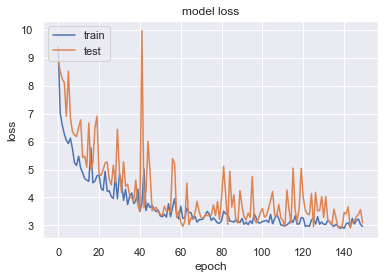

In [50]:
sns.set(rc={'figure.figsize':(6,4)})

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

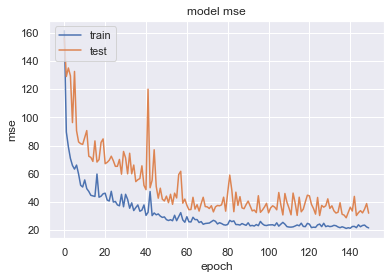

In [51]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()